<a href="https://colab.research.google.com/github/siddhartha1506/project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

**Loading the csv file**

In [ ]:
path='/content/drive/MyDrive/cancer.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


**Checking for the result from the data**
Malignant = 1 (have cancer)
Benign = 0 (do not have cancer)

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Data preprocessing**

Checking the missing values in columns

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Deleting the id and Unnamed column

In [ ]:
df= df.drop(['Unnamed: 32','id'],axis=1)

**Analysing the available data and exploring relationships among given variables**

**Checking correlation**

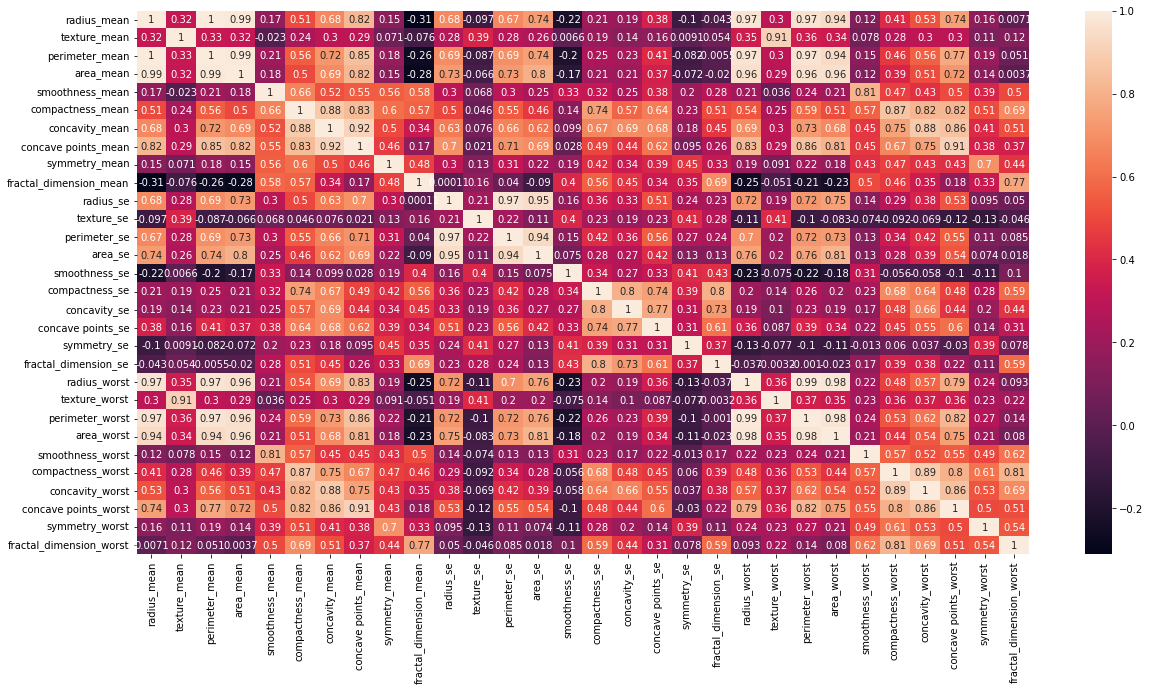

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

**Highly correlated and low correlated features used from above figure**

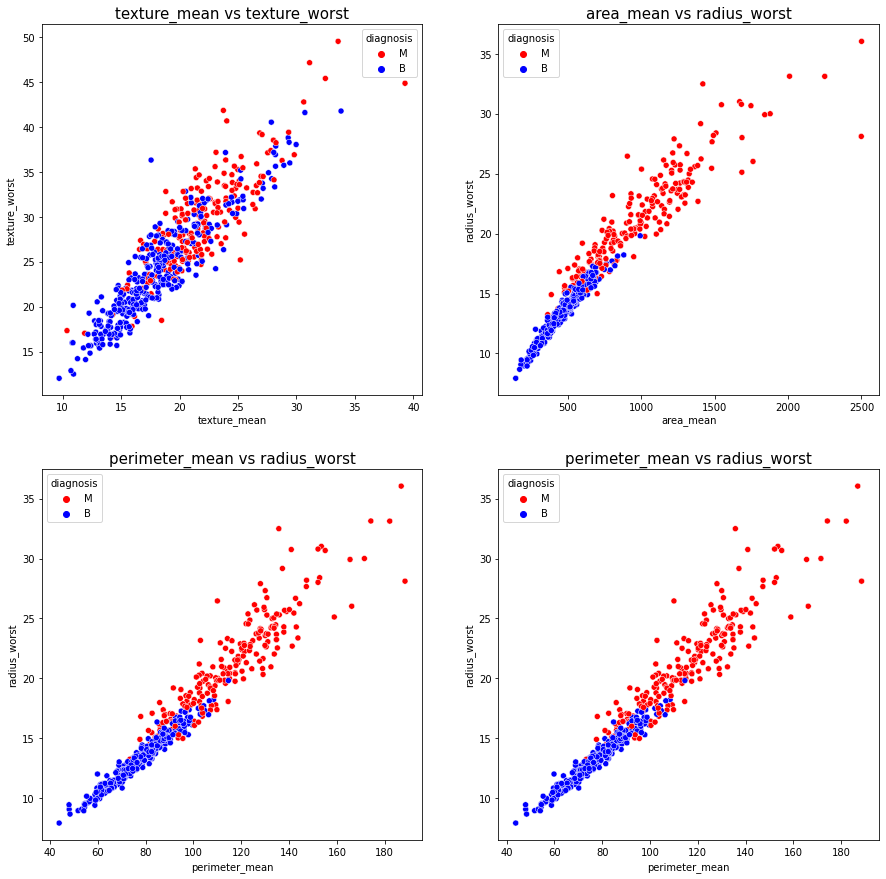

In [ ]:
palette ={'B' : 'blue', 'M' :'red'}
fig = plt.figure(figsize=(15,15))
def plot_scatter(a,b,c):
    plt.subplot(c)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)    
plot_scatter('texture_mean','texture_worst',221) 
plot_scatter('area_mean','radius_worst',222) 
plot_scatter('perimeter_mean','radius_worst',223)  
plot_scatter('perimeter_mean','radius_worst',224) 

**Lowly correlated**

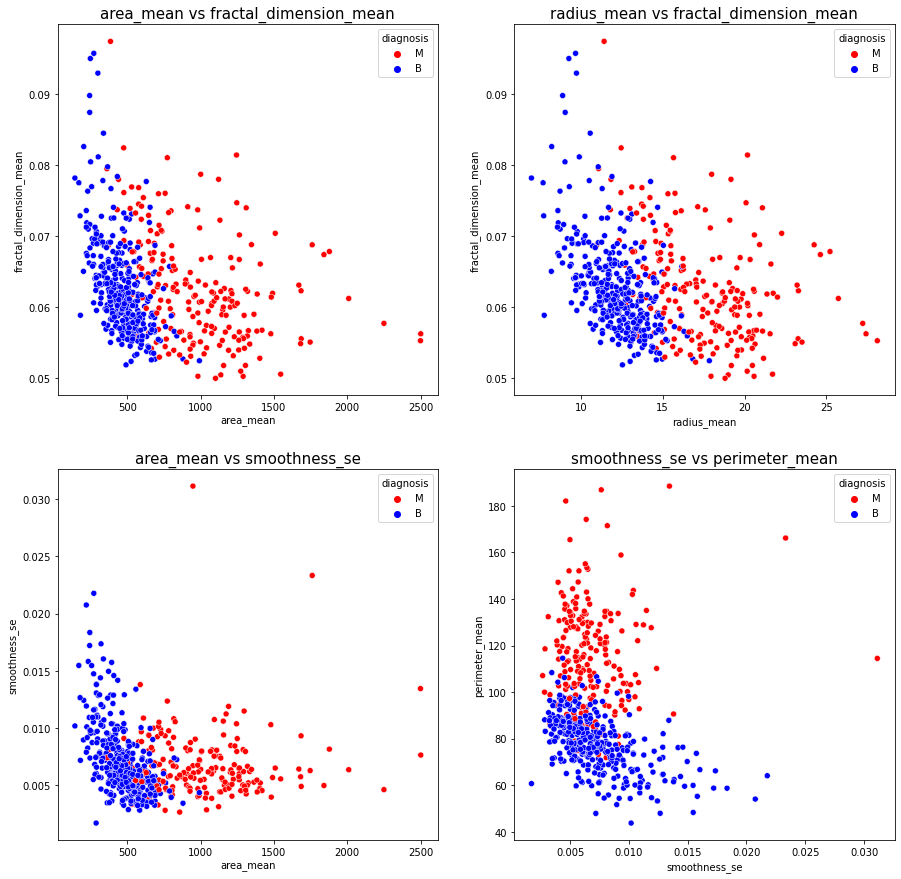

In [ ]:
fig = plt.figure(figsize=(15,15))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

For training changing the result from B and M to 0 and 1 respectively

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Marking the features for training**

In [ ]:
x=df.drop('diagnosis',axis=1).values
y=df['diagnosis'].values
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=40)

**Feature Scaling**
Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score.Feature Scaling, is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range.

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x1_train)
x_test= sc.transform(x1_test)

**Comparing the model to select the better model**

In [ ]:
# Logistic Regression
log=LogisticRegression()
log.fit(x_train, y1_train)
predlog= log.predict(x_test)


# Gradient Boosting Classifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y1_train)
predgbc=gbc.predict(x_test)


# Random Forest Classifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y1_train)
predrfc= rfc.predict(x_test)


# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y1_train)
preddtc=dtc.predict(x_test)


# KNeighbors Classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y1_train)
predknn=knn.predict(x_test)


# Support Vector classifier
svc=SVC(probability=True)
svc.fit(x_train,y1_train)
predsvc=svc.predict(x_test)

**Accuracy of the all the models to select the better model**

In [ ]:
accuracy_of_models=[]
modelnames=[LogisticRegression(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
model_types=['LogisticRegression','GradientBoostingClassifier','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','SVC']
for i in range(len(modelnames)):
    model=modelnames[i]
    model.fit(x_train,y1_train )
    predict=model.predict(x_test)
    accuracy_of_models.append(accuracy_score(predict,y1_test))

In [ ]:
df1={'Accuracy':accuracy_of_models,'model_type':model_types}
df2=pd.DataFrame(df1)
print(df2)

   Accuracy                  model_type
0  0.964912          LogisticRegression
1  0.956140  GradientBoostingClassifier
2  0.956140      RandomForestClassifier
3  0.964912      DecisionTreeClassifier
4  0.973684        KNeighborsClassifier
5  0.982456                         SVC


From the above table we can see SVC has higher accuracy
**We are using SVC in this case**

**Efficiency and Effectiveness of SVC classifier**

**Confusion matrix**

In [ ]:
cm1=np.array(confusion_matrix(y1_test,predsvc,labels=[1,0]))

confusion_matrix1= pd.DataFrame(cm1,index=['cancer','healthy'],
                           columns=['predicted_cancer','predicted_healthy'])

print(confusion_matrix1)

         predicted_cancer  predicted_healthy
cancer                 38                  1
healthy                 1                 74


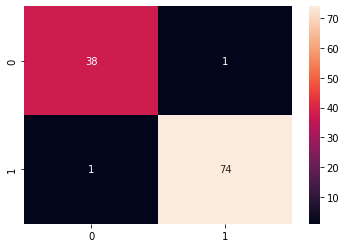

In [ ]:
sns.heatmap(cm1,annot=True,fmt='g')

**Accuracy score**

In [ ]:
print(accuracy_score(y1_test,predsvc))

0.9824561403508771


**Precision**

In [ ]:
print(precision_score(y1_test,predsvc))

0.9743589743589743


**Recall**

In [ ]:
print(recall_score(y1_test,predsvc))

0.9743589743589743


**Classification Report**

In [ ]:
print(classification_report(y1_test,predsvc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



True Positive(TP):74
True Negative(TN):38
False Positive(FP):1
False Negative(FN):1

True Positive Rate/Recall/Sensitivity: How often the model predicts benign when it's actually benign?

**True Positive Rate(TPR)=TP/TP+FP=74/(74+1)= 0.986**

False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?

**False Positive Rate(FPR) = FP/FP+TN = 1/1+38 = 0.025**

**ROC Curve**

0.9955555555555555


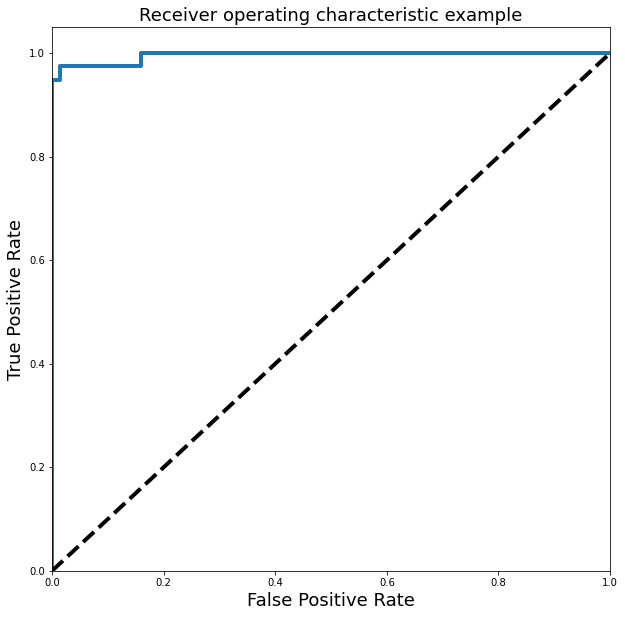

In [ ]:
y_score=svc.decision_function(x_test)

FPR, TPR,_=roc_curve(y1_test, y_score)
ROC_AUC = auc(FPR,TPR)
print(ROC_AUC)

plt.figure(figsize =[10,10])
plt.plot(FPR, TPR, label='ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1],'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example', fontsize= 18)
plt.show()

The svc Classifier give a curve closer to the top-left corner so it indicate a better performance.

**Area Under Curve**

In [ ]:
roc_auc_score(y1_test, y_score)

0.9955555555555555

A perfect classifier has ROC AUC closer to 1